book: **Data Mining the textbook** (ch. 18.5)  
book: **[Mining of Massive Datasets](https://www.cambridge.org/core/books/mining-of-massive-datasets/C1B37BA2CBB8361B94FDD1C6F4E47922)** (ch. 9)  
http://infolab.stanford.edu/~ullman/mmds/ch9.pdf  
https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243  

# Recommender Systems
## Utility matrix

<img align="right" style="padding-left:10px;" src="figures/big-utility-matrix.png" width="40%"> In a recommendation-system application there are two classes of **entities**
  * `users` and `items`
  
For $n$ **users** and $d$ **items**,  
this results in an $n \times d$ `utility-matrix` $D$  
of `utility values`.

### Different utility matrices
The nature of the **utility matrix** has a significant influence on the choice of **recommendation algorithm**

<img src="figures/utility-matrix-example.png" width="50%">

### Utility matrices with Positive preferences only

For example, 
* a specification of a "**like**" option on a social networking site, 
* the **browsing of an item** at an online site, 
* the **buying** of a specified **quantity** of an item. 

### Utility matrices with Positive and Negative preferences (ratings)

* The **user** specifies the **ratings** that represent their **like** or **dislike** for the **item**. 
* The incorporation of user dislike in the analysis is significant because it makes the **problem more complex** and often requires some changes to the underlying algorithms.

### Python code

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### Loading  [MovieLens 100K](https://grouplens.org/datasets/movielens/) Dataset

In [2]:
#Reading ratings file:
ratings = pd.read_csv('data/ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'],  encoding='latin-1')

In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id           100000 non-null int64
movie_id          100000 non-null int64
rating            100000 non-null int64
unix_timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


#### Create the utility matrix

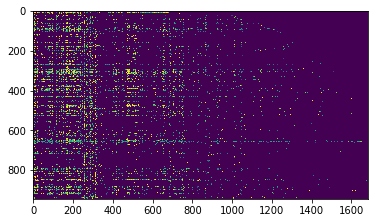

In [6]:
max_user  = int(ratings["user_id"].max() + 1)
max_movie = int(ratings["movie_id"].max() + 1)

m = np.zeros((max_user, max_movie))
m[ratings["user_id"], ratings["movie_id"]] = ratings["rating"]
plt.imshow(m, interpolation='nearest');

## The Long Tail

**Physical delivery systems** are characterized by a scarcity of resources. <img align="right" style="padding-left:10px;" src="figures/long_tail_final.png" width="50%">  
**On-line stores** can make anything that exists available to the customer.

## Applications of Recommendation Systems
1. **Product Recommendations**: Amazon or similar on-line vendors  
   Example of similarity: *purchasing decisions made by similar customers*

2. **Movie Recommendations**: the Netflix example...  
   Example of similarity: ratings provided by similar users 
   *Netflix offered a prize of one million dollars for the first algorithm that could beat its own recommendation system by 10%.*

3. **News Articles**: identify articles of interest to readers.  
   Example of similarity: important words in the documents.

4. The **Runner-Recommender** of workout and nutrition for runners  
   based  on  runner  profile,  preferences... 
5. The **Student-Recommender** of courses  
   based  on  student  profile,  preferences... 
6. **etc**...

## How to enhance Recommendations?

Recommendations can also be enhanced with the use of **content** in the **user and item representations**.
1. **Content-based filtering**: users and items are both associated with feature-based descriptions. 
   * For example, item profiles can be determined by using the **text of the item description**.
2. **Collaborative filtering**: is the leveraging of the user preferences in the form of ratings or buying behavior in a “collaborative” way, for the benefit of all users. 

The two models are not exclusive.  
It is often possible to combine content-based methods with collaborative filtering methods.

|content-based-filters | collaborative-based-filters|
| :-:| :-:|
|<img src="figures/content-based-filters.png" width="40%"> | <img src="figures/collaborative-based-filters.png" width="55%">|

## Content-Based Recommendations

**Content based filtering** uses `characteristics` or `properties` of an **item** to serve recommendations. 
* Characteristic information includes:
  * Characteristics of **Items** 
    * Keywords
    * Attributes
  * Characteristics of **Users** 
    * specified demographic profile, 
    * specified interests at registration time, 
    * the product description of the items bought, 
    * and so on. 

### Example: Movie recommendation system based on item content

Characteristics for the **item** `Harry Potter and the Sorcerer’s Stone` might include:
* **Director Name** – Chris Columbus
* **Genres** – Adventure, Fantasy, Family (IMDB)
* **Stars** – Daniel Radcliffe, Rupert Grint, Emma Watson

<img src="figures/content-based-filtering-harry-potter.webp" width="50%">

A **content based recommender system** can now **serve the user**:

* **More** Harry Potter Movies
* **More** Adventure, Family, or Fantasy Movies
* **More** Chris Columbus Movies
* **More** Daniel Radcliffe Movies

Once the **user makes choices**, the recommender system can serve **more targeted results**.

* User chooses `Swiss Army Man` next. <br>
  It’s safe to assume the <font style="color:blue">user likes movies starring Daniel Radcliffe</font>. 
* The system tracks these choices and **begins to recommend Daniel Radcliffe films**.
* The system may also show the user more Harry Potter movies. 

### Example: Movie recommendation system based on user content

Content based filtering systems can also serve users items **based on users’ profiles**. 
* You can create **user profiles** based on **historical actions**. 
* You can also ask in advance about their **interests** and **preferences**.

<img src="figures/user-profile-based-recommender.png" width="60%">

### Item Profiles

* In a content-based system, we must construct **for each item a profile**, 
  * a collection of `important characteristics` of that item.
* In the **movie example**
  * The set of actors of the movie
  * The director
  * The year in which the movie was made
  * The *genre* of movie (comedies, dramas, romances, etc.)

### Discovering Features of Documents

For items like **document collections** and **images** where it is **not** immediately apparent what the **values of features** should be.
* extracting **features from documents**  (news articles, web pages, etc..)
* user-supplied or authomatic **features from images** (<font style="color:blue">Fashion E-commerce, artistic paintings, furnitures</font>,...)

### Obtaining Item Features From Tags

We can calculate simple properties of pixels, such as the **average amount of red** in the picture,  
but `few users are looking for red pictures` or especially like red pictures.
* We can invite users to **tag** the items/images by entering **words or phrases** that describe the item.
  * a picture with a lot of red might be tagged “`Tiananmen Square`” 
  * another is tagged “`sunset at Malibu`”
* We can use the **tags** as a **recommendation system**. 
  * We can recommend other documents with the same tags.

### Representing Item Profiles
Goal for content-based recommendation is to create 
* an **item profile** consisting of <font style="color:blue">feature-value pairs</font>  
  * **boolean**: a vector of 0’s and 1’s, where a 1 represented the occurrence of a word in the document
  * **numerical**: for example **screen size** or **disk capacity** for PC’s, should be considered similar if their values do not differ greatly
* a **user profile** summarizing the preferences of the user, based of their row of the utility matrix. 


**Item profile example**

* **Features of movies** are the set of **actors** and the **average rating**. 
  * **movie 1**: $0$ $1$ $1$ $0$ $1$ $1$ $0$ $1$ $3\alpha$
  * **movie 2**: $1$ $1$ $0$ $1$ $0$ $1$ $1$ $0$ $4\alpha$
  
$${\text{similarity}}=\cos(\theta )={movie_1\cdot movie_2 \over \|movie_1\|\|movie_2\|}=\frac{2+12\alpha^2}{\sqrt{25+125\alpha^2+144\alpha^4}}$$

* If we choose $α = 1$, then the cosine is 0.940 $\rightarrow$ the vectors appear much closer in direction.  
* If we use $α = 1/2$, then the cosine is 0.619 $\rightarrow$ the vectors look quite different. 

### User Profiles
* We have the **utility matrix** representing the connection between **users** and **items**.
* we need to **create vectors** describing the **user’s preferences**.
  * using some **aggregation** of the **items profile**
  * e.g. the **average** of the components of the vectors representing the item profiles for the items in which the utility matrix has 1 for that user.

**User profile example 1**

* **Features of movies** are the set of **actors** 
* **utility matrix** has a 1 if the user has seen the movie and is blank otherwise
* If $20\%$ of the movies that user U likes have `Julia Roberts` as one of the actors, then the user profile for U will have $0.2$ in the component for Julia Roberts.
* If the **utility matrix** is **not boolean**, e.g., ratings 1–5, then we can weight the vectors representing the profiles of items by the utility value

**User profile example 2**
Same movie information of previous example.
* **utility matrix** has nonblank entries that are **ratings** in the 1–5 range
* User $U$ gives an **average rating** of 3.
  * three movies with `Julia Roberts`, with **ratings** of 3, 4, and 5.
  * **subtracting the average**: the average of 3 − 3, 4 − 3, and 5 − 3, that is, a value of 3/3=1.
* User $V$ gives an **average rating** of 4.
  * three movies with `Julia Roberts`, with **ratings** of 2, 3, and 5.
  * **subtracting the average**: the average of 2 − 4, 3 − 4, and 5 − 4, that is, a value of -2/3.

### Recommending Items to Users Based on Content

With **profile vectors** for both **users** and **items**, we can 
* estimate the degree to which a user would prefer an item 
* by computing the **cosine distance** between the **user’s and item’s vectors**.

### Classification Algorithms

**For each user**, build a <font style="color:red">classifier</font> that **predicts the rating of all items**.
* We can use a great number of different classifiers but now we will use a **decision tree**
  * the decision would be “`likes`” or “`doesn’t like`”.


**Example: news articles**

* **Items** are news articles, and **features** are the high-TF.IDF words (keywords) in those documents. 
* **user** U likes articles about baseball, except articles about the New York Yankees.
* The **row** of the **utility matrix** for U has 
  * 1 if U has **read the article** 
  * is **blank** if not. 
* We shall take the 1’s as “`like`” and the blanks as “`doesn’t like`”. 

* Since U generally **likes baseball**, we might find that the **best keyword** for the root is “`homerun`” OR (“`batter`” AND “`pitcher`”). <img align="right" style="padding-left:10px;" src="figures/decision-tree4recommendation-sys.png" width="50%"> 
* Items that satisfy the predicate will tend to be positive examples (articles with 1 in the row for U in the utility matrix), and items that fail to satisfy the predicate will tend to be negative examples (blanks in the utility-matrix row for U ). 
* We can use **one decision tree per user**. 

### Python example: build a simple content-based movie recommender 
**using Natural Language Processing (NLP)** to <font style="color:red">detect similarities between movies</font> 
* **Dataset**: top `250 top rated movies` from IMDB.
* 250 observations (the movies) and 38 columns. 
* We are interested only on 
  * the movie director, 
  * main actors, 
  * genre, 
  * plot.

**Load data**

In [8]:
import pandas as pd
from rake_nltk import Rake
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('https://query.data.world/s/uikepcpffyo2nhig52xxeevdialfl7')

df = df[['Title','Genre','Director','Actors','Plot']]
df.head()

,Title,Genre,Director,Actors,Plot
0,The Shawshank Redemption,"Crime, Drama",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...
1,The Godfather,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...
2,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...
3,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...
4,12 Angry Men,"Crime, Drama",Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...


**Data cleaning**
* We are using a `Rake` function to **extract keywords** from the Plot column
  * RAKE: `Rapid Automatic Keyword Extraction` algorithm using NLTK
* So, instead of using the entire **sentences describing the plot**, we only considered the most relevant words. 

In [ ]:
# initializing the new column
df['Key_words'] = ""

for index, row in df.iterrows():
    plot = row['Plot']
    
    # instantiating Rake, by default it uses english stopwords from NLTK
    # and discards all puntuation characters as well
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(plot)

    # getting the dictionary whith key words as keys and their scores as values
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column for the corresponding movie
    row['Key_words'] = list(key_words_dict_scores.keys())

# dropping the Plot column
df.drop(columns = ['Plot'], inplace = True)

Transforming the **full names of actors and directors in single words** so they are considered as unique values.

In [ ]:
# discarding the commas between the actors' full names and getting only the first three names
df['Actors'] = df['Actors'].map(lambda x: x.split(',')[:3])

# putting the genres in a list of words
df['Genre'] = df['Genre'].map(lambda x: x.lower().split(','))

df['Director'] = df['Director'].map(lambda x: x.split(' '))

# merging together first and last name for each actor and director, so it's considered as one word 
# and there is no mix up between people sharing a first name
for index, row in df.iterrows():
    row['Actors'] = [x.lower().replace(' ','') for x in row['Actors']]
    row['Director'] = ''.join(row['Director']).lower()

In [ ]:
# reassigne the index to the movie title column
df.set_index('Title', inplace = True)
df.head()

Merge all the words into a single column `bag_of_words`

In [ ]:
df['bag_of_words'] = ''
columns = df.columns
for index, row in df.iterrows():
    words = ''
    for col in columns:
        if col != 'Director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
df.drop(columns = [col for col in df.columns if col!= 'bag_of_words'], inplace = True)

In [ ]:
df.head()

**Modeling**
* In order to <font style="color:red">detect similarities between movies</font>, we need to vectorize. 
* We will use `CountVecorizer`
* Once we have the **matrix** containing the count for each word, we can apply the `cosine_similarity` function
<img src="figures/count_vectorizer_movies.png" width="50%">

In [ ]:
# instantiating and generating the count matrix
# CountVectorizer convert a collection of text documents to a matrix of token counts
count = CountVectorizer()
count_matrix = count.fit_transform(df['bag_of_words'])
# print(count.get_feature_names())
# from sparse representation to matrix
# print(count_matrix.toarray()) 

In [ ]:
# generating the cosine similarity matrix# genera 
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

The similarity matrix looks like this
<img src="figures/similarity_matrix.png" width="50%">

**Function: the top similar movies**  

We can write the actual function that takes a **movie title as input**, and returns the **top 10 similar movies**. 

In [ ]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(df.index)

# INPUT: movie title 
# RETURNS: the top 10 recommended movies
def recommendations(title, cosine_sim = cosine_sim):
    
    # initializing the empty list of recommended movies
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(df.index)[i])
        
    return recommended_movies

**Testing the recommender**

In [ ]:
recommendations('Fargo')

In [ ]:
recommendations('No Country for Old Men')

<div class="alert alert-success">
    
## Practice 
1. Build a new content-based movie recommender, replacing the cosine_similarity with `sklearn.metrics.pairwise.euclidean_distances`
2. Compare some test results
</div>

In [ ]:
# write your code here:


## Neighborhood-Based Methods for Collaborative Filtering

## Graph-Based Methods

## Clustering Methods

## Latent Factor Models